***
**Algorithmes d'optimisation -- L3 MINT et doubles licences 2018/2019 -- Université Paris-Sud**
***

# TP 1: Minimisation de fonctionnelles quadratiques convexes

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$

## Préliminaires
Dans ce TP, on s'intéresse à la minimisation sur $\Rsp^N$ de fonctionnelles de la forme suivante,

$$ 
\begin{aligned}
f(x) &= \frac{1}{2} \sca{x}{Q x} + \sca{b}{x} \\
&= \frac{1}{2} \sum_{1\leq i\leq j \leq N} Q_{ij} x_i x_j + \sum_{1\leq i\leq N} b_i x_i,
\end{aligned} $$

où $Q$ est une matrice symétrique définie positive et $b$ est un vecteur colonne. Notre objectif principal est de constater numériquement un phénomène expliqué en cours, à savoir que l'efficacité des méthodes de descente de gradient dépend crucialement du *conditionnement* de la matrice $Q$ (voir ci-dessous pour une définition).

**Quelques commentaires sur les Notebook.**
Ce texte est rédigé sous la forme d'un notebook. Un notebook comporte des cellules de texte et des cellules de code, ici en Python. Quelques raccourcis clavier et remarques utiles:

- `CTRL+Entrée`: exécute la cellule de code, et affiche son résultat.
- `Tab`: Si l'on `Tab` après avoir tapé les premières lettres d'un nom de fonction, le système propose une liste de possibilités (ce qui peut permettre d'éviter des erreurs de frappe)
- `MAJ+Tab`: Affiche la documentation sur la fonction. Très utile pour ne pas se tromper sur l'ordre des paramètres. On peut voir une documentation plus complète en cliquant sur le '+'.
- `CTRL+s`: Enregistrer les modifications apportées au Notebook.
- Le symbole `[*]` à côté d'une cellule de code indique que le noyau Python est toujours en train de calculer. On peut l'interrompre via `Kernel -> Interrupt` ou le redémarrer via `Kernel -> Restart`. Le noyau Python repart alors de zéro, et il faut donc relancer les cellules antérieures à celle sur laquelle on travaillait.

Une aide complète, ainsi que la documentation de Python et Numpy, est disponible dans le menu `Aide`.

**Rappels de cours et du TD précédent.**
Ce TP ne nécessite que quelques définitions et théorème du cours et des cours précédents, que l'on rappelle ici (le théorème de convergence ci-dessous sera démontré un peu plus tard, dans un cas plus général).

> **Proposition:** Une fonction $f\in\mathcal{C}^2(\Rsp^d)$ est convexe si pour tout $x\in\Rsp^d$, $D^2 f(x)$ est une matrice symétrique positive, i.e. $\forall x\in\Rsp^d,\forall v\in \Rsp^d, \sca{v}{D^2 f(x) v} \geq 0$.

> **Proposition:** Si $f \in \mathcal{C}^1(\Rsp^d)$ est convexe, alors $x^* = \arg\min_{x\in \Rsp^d} f(x) \Longleftrightarrow \nabla f(x^*) = 0. $

> **Théorème:** Toute matrice symétrique $Q$ est diagonalisable dans une base orthonormale. En d’autres mots, il existe une matrice orthogonale P telle que $ P^TQP$
soit diagonale.

> **Définition:** On appelle *conditionnement* d'une matrice symétrique définie positive $Q\in M_N(\Rsp)$ de valeurs propres $0< \lambda_1\leq \dots \leq \lambda_N$ la quantité $\cond(Q) = \lambda_N / \lambda_1$. 

> **Théorème:** Soit $f(x) = \frac{1}{2} \sca{x}{Q x} + \sca{b}{x}$ où $Q$ est une matrice symétrique définie positive, et soient  $(x^{(k)})_{k\geq 0}$ les itérées de l'algorithme de descente de gradient à pas optimal, c'est à dire $x^{(0)} \in \Rsp^d$ et 
$$ \begin{cases}
d^{(k)} = \nabla f_K(x^{(k)})\\
t^{(k)} = \arg\min_{t} f(x^{(k)} + t d^{(k)})  &\hbox{ pour $k\geq 0$}\\
x^{(k+1)} = x + t^{(k)} d^{(k)}.
\end{cases}
$$
alors, avec $x^* = \arg\min_x f(x)$ et $c = 1 - \cond(Q)^{-1} < 1$, on a
$$ f(x^{(k+1)}) - f(x^*) \leq c(f(x^{(k)}) - f(x^*)).$$

## I. Gradient à pas optimal en dimension $N=2$ 

Pour commencer, on commence par considérer la minimisation de la fonction $f_K:\Rsp^2\to\Rsp$ définie par $f_K(x) = \frac{1}{2}Kx_1^2 + \frac{1}{2}x_2^2$ où $K$ est une constante strictement positive.

**QI.1.** Calculer le gradient et la matrice hessienne de $f_K$, montrer que $f_K$ est convexe. Montrer que son unique minimiseur sur $\Rsp^2$ est $x^* = (0,0)$.

> **Réponse:** 
Le calcul des dérivées partielles donne 
$$ \nabla f_K(x) = \begin{pmatrix} K x_1\\ x_2\end{pmatrix} \qquad \D^2 f_K(x) = \begin{pmatrix} K & 0 \\ 0 & 1 \end{pmatrix}$$
Comme la Hessienne est positive, la fonction est convexe (elle est même strictement convexe comme $\D^2 f_K(x)$ est définie positive).


**QI.2.** Étant donné un point $x^{(k)} = (x_1^{(k)},x_2^{(k)}) \in \Rsp^2$ et $d^{(k)} = -\nabla f_K(x)$, calculer le pas  optimal $t^{(k)}$. 

*(Indication: On pourra utiliser la formule générale pour le pas donnée en partie II pour une fonction de la forme $f(x) = \frac{1}{2}\sca{x}{Qx} + \sca{b}{x}$.)*

> **Réponse:** 
Il suffit de calculer $g$ et sa dérivée et de trouver l'unique $t$ tel que $g'(t) = 0$:
$$ g(t) = \frac{1}{2} K (x_1 - t K x_1)^2 + \frac{1}{2} (x_2 - tx_2)^2 $$
$$ g'(t) = K^2 x_1 (t K x_1 - x_1) + x_2(tx_2 - x_2) = t(K^3 x_1^2 + x_2^2) - (K^2 x_1^2 + x_2^2) $$
soit
$$ t^* = (K^2 x_1^2 + x_2^2)/(K^3 x_1^2 + x_2^2) $$


**QI.3.** Programmer l'algorithme du gradient à pas optimal, et le tester  pour $K=2$. On arrêtera les itérations dès que $f_K(x^{(k)}) \leq f_K(x^*) + 10^{-8}$.  Tracer deux figures :
* la trajectoire des itérées $(x_1^{(k)}, x_2^{(k)})_{k\geq 1}$ (via la fonction `plt.plot`)
* l'évolution de l'erreur $\log(f(x^{(k)}) - f(x^*))$ en fonction de $k$.
Que se passe-t-il lorsque l'on change $K$ ?

(*Indication: On pourra stocker la liste des itérées $x^{(k)}$ et des valeurs $f(x^{(k)})$ dans deux listes `X` et `F`, et utiliser la fonction `X.append(...)` pour ajouter un élément à la liste `X`. Pour l'erreur, on recommande la fonction `plt.semilogy`.*)


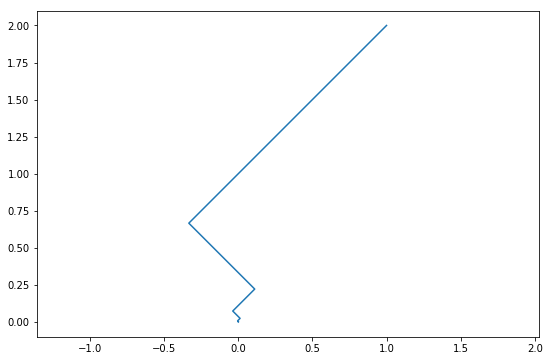

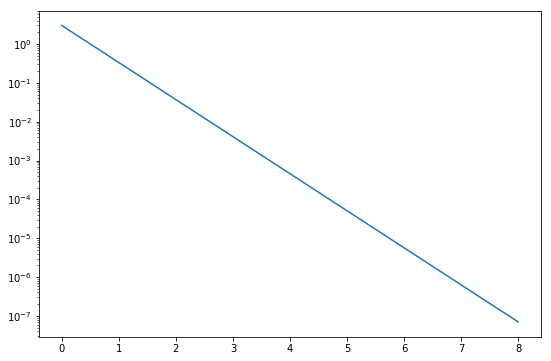

In [1]:
# on importe les modules numpy et pyplot
import numpy as np
import matplotlib.pyplot as plt
# les deux commandes suivante paramètrent l'affichage des figures
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.,6.]

# initialiser les variables K,Q, x0, fmin
K = 2.
X = [] # tableau pour stocker la liste des itérées x^k
F = [] # tableau pour stocker la liste des valeurs f(x^k)
x = np.array([1.,K]) 

while(True):
    # calculer la direction de descente d, le pas t et arrêter si le critère d'arrêt est vérifié
    d = -np.array([K*x[0], x[1]]) 
    f = .5*(K*x[0]**2 + x[1]**2)  
    if f <= 1e-8:
        break
    t = ((K**2)*x[0]**2 + x[1]**2)/((K**3)*x[0]**2 + x[1]**2)
    
    F.append(f)
    X.append(x)
    x = x + t*d
X = np.array(X)
F = np.array(F)

# afficher les résultats
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.axis('equal')
plt.figure()
plt.semilogy(range(len(F)),F)


**QI.4.** Recommencer l'expérience en choisissant $K = 10,100,500$. Calculer le taux de décroissance moyen (c'est-à-dire la moyenne de $(f_K(x^{(k+1)})-f(x^*))/(f_K(x^{(k)}) - f(x^*)$) et le comparer à la borne donnée dans le théorème de convergence rappelé en préliminaire.

In [3]:
for K in [10,100,500]:
    F = [] # tableau pour stocker la liste des valeurs f(x^k)
    x = np.array([1.,K]) 

    for i in range(5000): # on limite à 5000 itérations
        # calculer la direction de descente d, le pas t et arrêter si le critère d'arrêt est vérifié
        d = -np.array([K*x[0], x[1]]) 
        f = .5*(K*x[0]**2 + x[1]**2)  
        if f <= 1e-8:
            break
        t = ((K**2)*x[0]**2 + x[1]**2)/((K**3)*x[0]**2 + x[1]**2)
        x = x + t*d
        F.append(f)
    F = np.array(F)
    niter = len(F)
    print('nombre d\'itérations pour K=%d: %d' % (K, len(F)))
    print('taux de décroissance moyen pour K=%d: %g' % (K,np.mean(F[1:niter]/F[0:(niter-1)])))
    print('taux de décroissance théorique K=%d: %g\n' % (K,1-min(1.,K)/max(1.,K)))


nombre d'itérations pour K=10: 56
taux de décroissance moyen pour K=10: 0.669421
taux de décroissance théorique K=10: 0.9

nombre d'itérations pour K=100: 674
taux de décroissance moyen pour K=100: 0.960788
taux de décroissance théorique K=100: 0.99

nombre d'itérations pour K=500: 3770
taux de décroissance moyen pour K=500: 0.992032
taux de décroissance théorique K=500: 0.998



## II. Gradient à pas optimal pour un problème de moindres carrés 

On commence par écrire l'algorithme de gradient à pas optimal pour minimiser sur   $\Rsp^N$ une fonction de la forme $$f(x) = \frac{1}{2} \sca{Q x}{x} + \sca{b}{x}$$
où $Q$ est une matrice $N\times N$ symétrique définie positive et $b\in\Rsp^N$ est un vecteur.
En TD, nous avons vu que :
* $\nabla f(x) = Qx + b$, $\mathrm{D}^2 f(x) = Q$
* $f$ est convexe, et si $x^*$ est le minimiseur de $f$ sur $\Rsp^N$, alors il vérifie l'équation $\nabla f(x^*) = Qx^*+b = 0$.
* l'algorithme de descente de gradient à pas optimal s'écrit 
$$ \begin{cases}
d^{(k)} = \nabla f_K(x^{(k)})\\
t^{(k)} = \frac{\sca{d^{(k)}}{d^{(k)}}}{\sca{d^{(k)}}{Qd^{(k)}}}.  &\hbox{ pour $k\geq 0$}\\
x^{(k+1)} = x^{(k)} + t^{(k)} d^{(k)}.
\end{cases}
$$

**QII.1** Programmer une fonction `gradient_optimal(Q,b,x0,err)`, prenant en argument la matrice $Q$, le vecteur $b$ et le point de départ $x^{(0)}$, qui calculera les itérées de la méthode de descente de gradient à pas optimal (cf préliminaires). De plus,
* Les itérations seront interrompues lorsque $\nr{d^{(k)}} \leq $ `err` (on pourra utiliser la fonction `np.linalg.norm`) ou dès que $k>10^6$.
* La fonction retournera le dernier point $x^{(k)}$ trouvé ainsi que deux vecteurs $E,F$ tels que $E^{(k)} = \nr{d^{(k)}}$ et $F^{(k)} = f(x^{(k)})$. 

Tester cette fonction avec une matrice $Q = A^T A + \mathrm{Id}$, où $A$ est une matrice aléatoire et $b$ est un vecteur aléatoire, pour $N=10$. On comparera la solution construite par l'algorithme de descente de gradient à la solution exacte $x^* = -Q^{-1}b$ retournée par `-np.linalg.solve(Q,b)`.


In [4]:
def gradient_optimal(Q,b,x0,err=1e-6):
    x = x0
    niter=0
    E = []
    F = []
    
    k = 0 # nombre d'itérations
    while (True): 
        k = k+1
        if k > 1e6: # maximum de 10^6 itérations
            print('erreur: nombre maximum d\'itérations atteint')
            break
        # calculer la direction de descente
        d = -(np.dot(Q,x)+b)
        E.append(np.linalg.norm(d))
        F.append(.5*np.dot(x,np.dot(Q,x)) + np.dot(b,x))
        # vérifier le critère d'arrêt, et quitter la boucle (avec break) s'il est vérifié
        if np.linalg.norm(d) <= err:
            break
        # calculer le pas de descente et mettre à jour x
        t = np.linalg.norm(d)**2/np.dot(np.dot(Q,d), d)
        x = x + t*d
    E = np.array(E)
    F = np.array(F)
    return x,E,F

In [5]:
# test de la fonction gradient_optimal pour un Q,b aléatoire
N = 10
A = np.random.randn(N,N)
Q = np.dot(A.T,A)+np.eye(N,N)
b = np.random.rand(N)
# on calcule la solution exacte en résolvant le système linéaire Qx = -b (cf question précédente)
sol = -np.linalg.solve(Q,b)
# appliquer le gradient à pas optimal et vérifier qu'on obtient la même solution
x,E,F = gradient_optimal(Q,b,np.zeros(N),1e-8)
print(np.linalg.norm(x-sol))


7.47832817473e-09


**Régression linéaire:** On possède un jeu de donnée constitué de points $(x_i,y_i)_{1\leq i\leq n} \in\Rsp^2$ et on cherche à trouver $(\mu_0, \mu_1) \in\Rsp^2$ minimisant la fonction 

$$ f: \mu\in\Rsp^2\mapsto \frac{1}{2} \sum_{1 \leq i \leq n} |\mu_0 + \mu_1 x_i - y_i|^2. $$

Ce problème d'optimisation peut être interprété de de la manière suivante. Étant donnée une abscisse à l'origine $\mu_0$ et une  pente $\mu_1$, on peut calculer la distance euclidienne  entre la donnée $(x_i,y_i)$ et le point $(x_i,\mu_0 + \mu_1 x_i)$ qui appartient à la droite 
$\mathcal{D} = \{ (x,y) \mid y = \mu_0 + \mu_1 x\}$, soit
$$\eps_i = |\mu_0 + \mu_1 x_i - y_i|$$
Le problème d'optimisation précédent consiste à trouver une droite d'abscisse à l'origine $\mu_0$ et de pente $\mu_1$ minimisant la somme des erreurs $\eps_1^2 + \hdots + \eps_n^2$, et passant donc au plus près du jeu de données. Cette méthode a été inventée simultanément par Gauss et [Legendre](http://www.bibnum.education.fr/sites/default/files/legendre-texte.pdf).

Pour nos expériences, les points de données $(x_i,y_i)$ sont construits de la manière suivante:

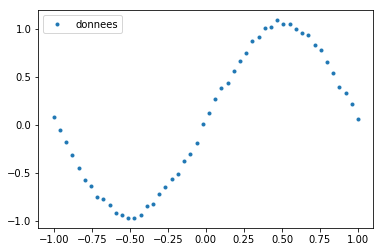

In [6]:
n=50
X = np.linspace(-1,1,n);
Y = np.sin(np.pi*X) + .1*np.random.rand(n)
plt.plot(X,Y,'.',label='donnees')
plt.legend()

**QII.2** Construire une matrice $A$ ayant $n$ lignes et $2$ colonnes telle que le vecteur $Z := (\mu_0 + \mu_1 x_i)_{1\leq i\leq n}$ s'écrive $Z = A\mu$ (produit matrice vecteur). Remarquer que l'on peut alors écrire $f(\mu) = \frac{1}{2} \nr{A \mu - Y}^2$ où $Y = (y_i)_{1\leq i\leq n}$.

> **Réponse:** 
On pose $A = [1 X]$ la matrice dont la première colonne est constituée entièrement de $1$ et la deuxième est le vecteur $X = (x_1,\hdots,x_n)$. Alors, $Z_i = \mu_0 + \mu_1 x_i = (A\mu)_i$.

**Remarque :** En TD, nous avons vu que la fonction $f(\mu) = \nr{A \mu - Y}^2$ peut être mise sous la forme $$f(\mu)=\frac{1}{2}\sca{\mu}{Q \mu} + \sca{b}{\mu} + c,$$
où $Q = A^T A$, $b = - A^T Y$ et $c = \frac{1}{2}Y^T Y$.
On a aussi montré que si la matrice $A$ injective alors $Q$ est symétrique définie positive.

**QII.3** Calculer le minimum  $\mu^*$ de $f$ à l'aide de la fonction `gradient_optimal`, tracer sur une même figure les points $(X,Y)$ et la droite $(X, A\mu^*)$. Vérifier la correction du résultat en le comparant à celui obtenu en résolvant le système linéaire $\nabla f(\mu^*) = 0$.

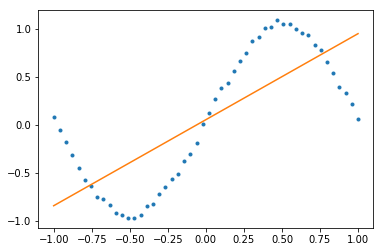

In [7]:
# calculer A, Q, b, puis appliquer l'algorithme du gradient à pas optimal
A = np.vstack([np.ones(n),X]).T
Q = np.dot(A.T,A)
b = -np.dot(A.T,Y)
mu,E,F = gradient_optimal(Q,b,np.zeros(2))
plt.plot(X,Y,'.')
plt.plot(X,np.dot(A,mu))


**Régression polynômiale** On s'intéresse maintenant à une généralisation du problème de régression linéaire. Il s'agit cette fois-ci d'approcher au mieux le jeu de données $(x_i,y_i)_{1\leq i\leq n}$ par des points de la forme $(x_i,P_\mu(x_i))_{1\leq i\leq N}$ où $P_\mu(X) = \sum_{0\leq i\leq d} \mu_i X^i$ est un polynôme de degré $d$ à déterminer. L'inconnue de notre problème est donc le vecteur $\mu \in \Rsp^{d+1}$, qu'on choisit via le problème d'optimisation suivant:
$$ \min_{\mu \in \Rsp^{d+1}} \frac{1}{2} \sum_{1\leq i\leq N} \nr{P_\mu(x_i) - y_i}^2, $$

**QII.4** Montrer que ce problème est équivalent au problème suivant:
$$ \min_{(\mu_0,\hdots,\mu_d) \in \Rsp^{d+1}} f_d(\mu) := \frac{1}{2} \nr{A_d \mu - Y}^2 \quad \hbox{ où } A_d = \begin{pmatrix} 1 & x_1 & x_1^2 & \hdots & x_1^d \\
1 & x_2 & x_2^2 & \hdots & x_2^d \\
\vdots & \vdots & \vdots & &\vdots \\
1 & x_n & x_n^2 & \hdots & x_n^d,
\end{pmatrix}$$
puis que $f_d$ est convexe et même strictement convexe si les points $x_i$ sont distincts deux à deux.

> **Réponse:** 
On identifie $\mu$ comme le vecteur des coefficients du polynôme $P$ : $P(X)=\sum^d_{i=0} \mu_i X^i$. On en déduit 
que $A_d\mu$ est le vecteur colonne ($n$ lignes) des évaluations de $P$ en $x_i$ et donc $\sum_{1\leq i\leq n}\nr{P(x_i) - y_i}^2= \nr{A_d \mu - Y}^2$.



**QII.5** Résoudre le problème d'optimisation pour $2\leq d \leq 7$ via la fonction `gradient_optimal`, en fixant `err=1e-4`. Interpréter l'accroissement du nombre d'itérations de l'algorithme en calculant le conditionnement des matrices $A_d$ via la fonction `np.linalg.cond`.

deg=2, condition=13.312869,niter=23
deg=3, condition=62.230914,niter=331
deg=4, condition=325.519883,niter=553
deg=5, condition=1666.465961,niter=5876
deg=6, condition=9034.326437,niter=14998
deg=7, condition=48152.315204,niter=79308


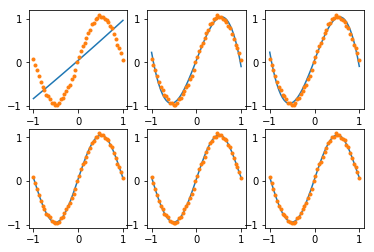

In [10]:
# on commence par construire la matrice A pour d=2, en guise d'exemple:
A = np.vstack([X**0, X**1, X**2]).T
# ou, de manière équivalente
A = np.vstack([X**i for i in range(3)]).T

# construire la matrice Q2, puis résoudre le problème d'optimisation par gradient à pas optimal
Q = np.dot(A.T,A)
b = -np.dot(A.T,Y)
# on applique ensuite l'algorithme du gradient à pas optimal pour retrouver mu
mu,E,F = gradient_optimal(Q,b,np.zeros(3),1e-4)


# une fois que ça fonctionne pour d=2, on traite les autres cas dans une boucle
for d in range(2,8):
    # calculer les matrice A et Q, le vecteur b
    A = np.vstack([X**i for i in range(0,d+1)]).T
    Q = np.dot(A.T,A)
    b = -np.dot(A.T,Y)
    # on applique ensuite l'algorithme du gradient à pas optimal pour retrouver mu
    mu,E,F = gradient_optimal(Q,b,np.zeros(d+1),1e-4)
    print('deg=%d, condition=%f,niter=%d' % (d,np.linalg.cond(Q),len(E)))
    plt.subplot(2,3,d-1) # on organise les figures dans un tableau à 2 lignes et 3 colonnes
    plt.plot(X,np.dot(A,mu))
    plt.plot(X,Y,'.')


**QII.6** On pose $g_d(\mu) = f_d(\mu) + \frac{\gamma}{2}\sum_{0\leq i\leq d} \mu_i^2$. Mettre $g_d$ sous la forme 
$$ g_d(\mu) := \frac{1}{2} \sca{\mu}{R_d \mu} + \sca{b_d}{T} \mu + c_d $$
et démontrer que $\cond(R_d) < \cond(Q_d)$ où $Q_d:=A^T_d A_d$. Vérifier que l'algorithme du gradient à pas optimal converge plus rapidement.

> **Réponse:** 
Soient $\lambda_1 \leq \hdots \leq \lambda_d$ les valeurs propres de $Q_d$. Alors, les valeurs propres de $R_d$ sont $\lambda_1+\gamma\leq\hdots\leq\lambda_d+\gamma$. On a donc 
$$ \cond(Q_d) =\frac{\lambda_d}{\lambda_1} \qquad \cond(R_d) =\frac{\lambda_d+\gamma}{\lambda_1+\gamma}. $$
Il suffit donc de démontrer que si $\gamma\geq 0$ et $\lambda_i\geq 0$,
$$ \frac{\lambda_d+\gamma}{\lambda_1+\gamma} \leq \frac{\lambda_d}{\lambda_1}, $$
ce qu'on vérifie facilement.


deg=2, condition=13.283965,niter=23
deg=3, condition=61.564747,niter=327
deg=4, condition=308.754186,niter=523
deg=5, condition=1303.272224,niter=4598
deg=6, condition=3672.104974,niter=6120
deg=7, condition=5481.963218,niter=9044


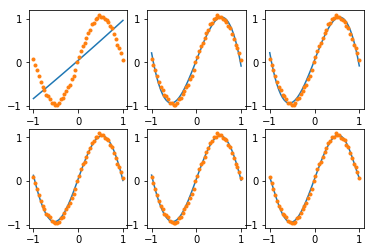

In [11]:
# NB: ci-dessous, on utilise la fonction np.eye() pour construire la matrice identité
plt.plot(X,Y,'.')
for d in range(2,8):
    A = np.vstack([X**i for i in range(0,d+1)]).T
    Q = np.dot(A.T,A) + 0.01*np.eye(d+1)
    b = -np.dot(A.T,Y)
    mu,E,F = gradient_optimal(Q,b,np.zeros(d+1),1e-4)
    print('deg=%d, condition=%f,niter=%d' % (d,np.linalg.cond(Q),len(E)))
    plt.subplot(2,3,d-1) # on organise les figures dans un tableau à 2 lignes et 3 colonnes
    plt.plot(X,np.dot(A,mu))
    plt.plot(X,Y,'.')


## III Exercice (valeurs propres et conditionnement)

**QIII.1** Soit $Q$ une matrice symétrique de taille $d\times d$ et $\lambda_1\leq \hdots\leq \lambda_d$ ses valeurs propres. 
Démontrer que pour tout $x \in \Rsp^d$, 
$$ \lambda_1 \nr{x}^2 \leq \sca{x}{Qx} \leq \lambda_d \nr{x}^2. $$
En déduire que 
$$ \lambda_1 = \min_{x \neq 0} \frac{\sca{x}{Qx}}{\nr{x}^2} \qquad 
\lambda_d = \max_{x \neq 0} \frac{\sca{x}{Qx}}{\nr{x}^2} $$

> **Réponse:** 
Comme $Q$ est symétrique, elle peut être diagonalisée en base orthonormale. Il existe donc $P$ une matrice orthogonale (telle que $P^T P = I_d$) et $D = \mathrm{diag}(\lambda_1,\hdots,\lambda_d)$ une matrice diagonale telle que $Q = P^T D P$. Alors,
$$\sca{x}{Qx} = \sca{x}{P^T D P x} = \sca{P x}{D P x}. $$
On pose $y = P x = (y_1,\hdots, y_d)$. Alors, comme $\lambda_d\geq \lambda_i$,
$$ \sca{P x}{D P x} = \sum_{1 \leq i\leq d} \lambda_i y_i^2 \leq \lambda_d \sum_{1\leq i\leq d} y_i^2 = \lambda_d \nr{Px}^2 $$
Or, comme $P$ est orthogonale, $\nr{Px}^2 = \sca{Px}{Px} = \sca{P^T P x}{x} = \nr{x}^2$. On en déduit l'inégalité 
$$ \sca{x}{Qx}\leq \lambda_d \nr{x}^2, $$
soit 
$$ \max_{x \neq 0} \frac{\sca{x}{Qx}}{\nr{x}^2} \leq \lambda_d. $$
On vérifie qu'il y a bien égalité en prenant $x$ un vecteur propre de $Q$ associé à la valeur propre $\lambda_d$. Le cas $\lambda_1$ se traite exactement de la même manière.


**QIII.2** On considère maintenant la matrice $Q_d = A_d^T A_d$ où $A_d$ est définie en QII.6. 
En considérant $\mu = (1,0,\hdots,0)$ (resp. $\mu = (0,\hdots,0,1)$) 
démontrer que 
$$\lambda_d \geq n \qquad (\hbox{resp. } \lambda_1 \leq \sum_{1\leq i\leq n} x_i^{2d})$$
En déduire une minoration de $\cond(Q_d)$ ne faisant intervenir que $n$ et $d$.

> **Réponse:** 
On applique la deuxième inégalité de la question précédente, en prenant $\mu=(1,0,\hdots,0)$:
$$ \lambda_d \geq \frac{\sca{Q_d \mu}{\mu}}{\nr{\mu}^2} = \sca{A_d^T A_d \mu}{\mu} = \nr{A_d\mu}^2 = n, $$
et le même type de raisonnement montre que $\lambda_1 \leq \sum_{1\leq i\leq n} x_i^{2d}$. De plus, 
$$
\begin{aligned}
\sum_{1\leq i\leq n} x_i^{2d} &= 2n \left(\frac{1}{2n} \sum_{1\leq i\leq n} x_i^{2d}\right) 
&\sim_{n\to+\infty} 2n \int_{-1}^1 x^{2d} d x = \frac{4n}{2d + 1},
\end{aligned}
$$
où l'on a utilisé la convergence des sommes de Riemann. Il faut noter qu'on pourrait être plus précis en découpant l'intégrale entre $[-1,0]$ et $[0,1]$, où la fonction $x\mapsto x^{2d}$ est monotone.
On obtient donc 
$$ \cond(Q_d) \geq \frac{\lambda_d}{\lambda_1} \sim_{n\to +\infty} \frac{2d+1}{4}. $$
Ainsi, le conditionnement se déteriore lorsque le degré croît. On remarquera que la borne donnée ci-dessus n'est pas très bonne, en comparant avec les calculs numériques.
